## **Python 시각화 기초**

### **matplotlib 라이브러리**

**Python에서 가장 많이 사용하는 라이브러리이다.**

**pandas의 DataFrame을 바로 시각화할 때도 내부적으로 matplotlib을 사용한다.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.1.1


![test](./img/구성요소.png)

#### **Figure**

**Figure는 그림이 그려지는 도화지라고 생각할 수 있다.**

> **우선 Figure를 그린 후, plt.subplots로 도화지를 분할해 각 부분에 그래프를 그리는 방식으로 진행한다.**

> **plt.figure를 명시적으로 표현해주는 것이 좋으나, plot함수에서 자동으로 figure를 생성하기 때문에 자주 사용하진 않는다.**

> **그러나 현재 figure에 접근해야 할 필요성이 있다면, plt.gcf()로 접근할 수 있다.**

**size를 조절하고 싶은 경우엔 fig.set_size_inches(18.5, 10.5)**

> **또는 plt.figure(figsize=(10,5))**

> **또는 plt.rcParams['figure.figsize'] = (10,7)**

#### **Axes**

**Axes는 plot이 그려지는 공간이다.**

#### **Axis**

**plot의 축이다.**

![test](./img/axiss.png)

<Figure size 432x288 with 0 Axes>

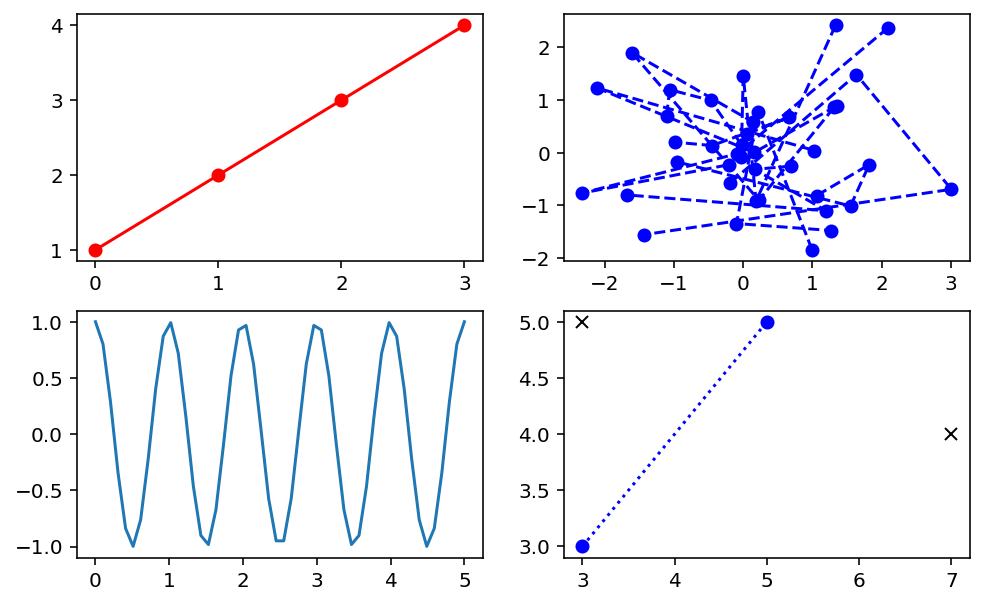

In [5]:
fig = plt.figure() # 도화지 생성
fig.suptitle('figure sample plots') # 이름설정

# subplots 2행2열의 4개의 그래프를 생성
fig, ax_lst = plt.subplots(2,2, figsize=(8,5))

# [0][0]은 우리 기준으로 1행 1열에 그래프에 해당
ax_lst[0][0].plot([1,2,3,4],'ro-')
# [0][1]은 우리 기준으로 1행 2열에 그래프에 해당
ax_lst[0][1].plot(np.random.randn(4,10), np.random.randn(4,10), 'bo--')
ax_lst[1][0].plot(np.linspace(0.0,5.0),np.cos(2*np.pi*np.linspace(0.0,5.0)))
ax_lst[1][1].plot([3,5],[3,5],'bo:')
ax_lst[1][1].plot([3,7],[5,4],'kx')
plt.show()

In [6]:
df = pd.DataFrame(np.random.randn(4,4))

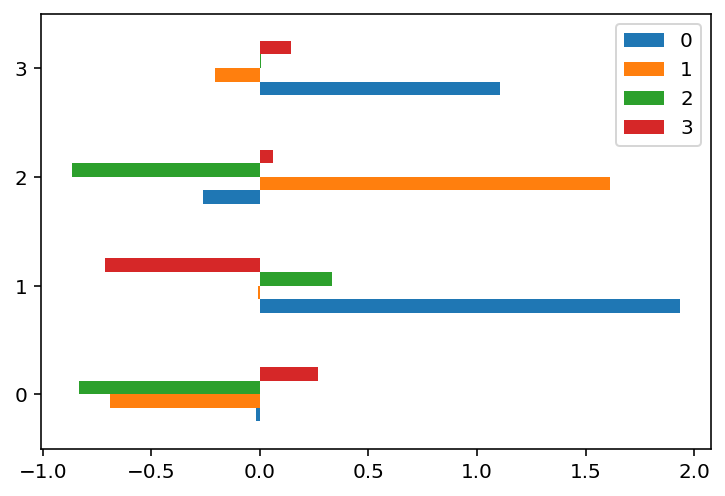

In [7]:
df.plot(kind='barh')

In [10]:
plt.style.use('ggplot')

<Figure size 432x288 with 0 Axes>

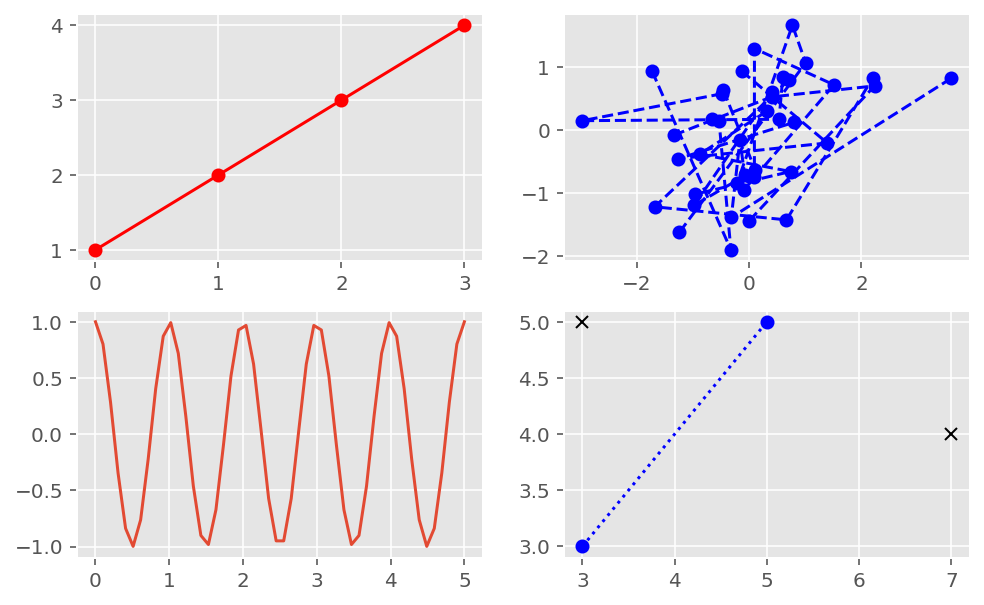

In [11]:
fig = plt.figure()
fig.suptitle('ggplot style')  

fig, ax_lst = plt.subplots(2, 2, figsize=(8,5))  

ax_lst[0][0].plot([1,2,3,4], 'ro-')
ax_lst[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')
ax_lst[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))
ax_lst[1][1].plot([3,5], [3,5], 'bo:')
ax_lst[1][1].plot([3,7], [5,4], 'kx')
plt.show()

### **Seaborn**

**seaborn은 matplotlib을 기반으로 다양한 색 테마, 차트 기능을 추가한 라이브러리이다.**

**matplotlib에 의존성을 가지고 있다.**

**matplotlib에 없는 그래프(히트맵, 카운트플롯 등)을 가지고 있다.**

In [12]:
import seaborn as sns
print("Seaborn version : ", sns.__version__)
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

Seaborn version :  0.9.0


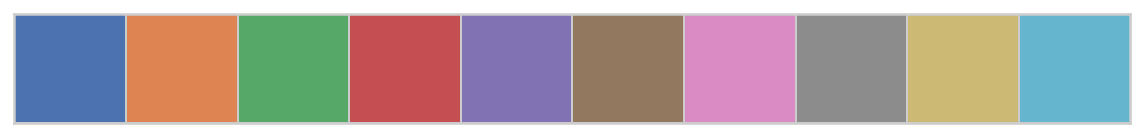

In [13]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

#### **relplot**

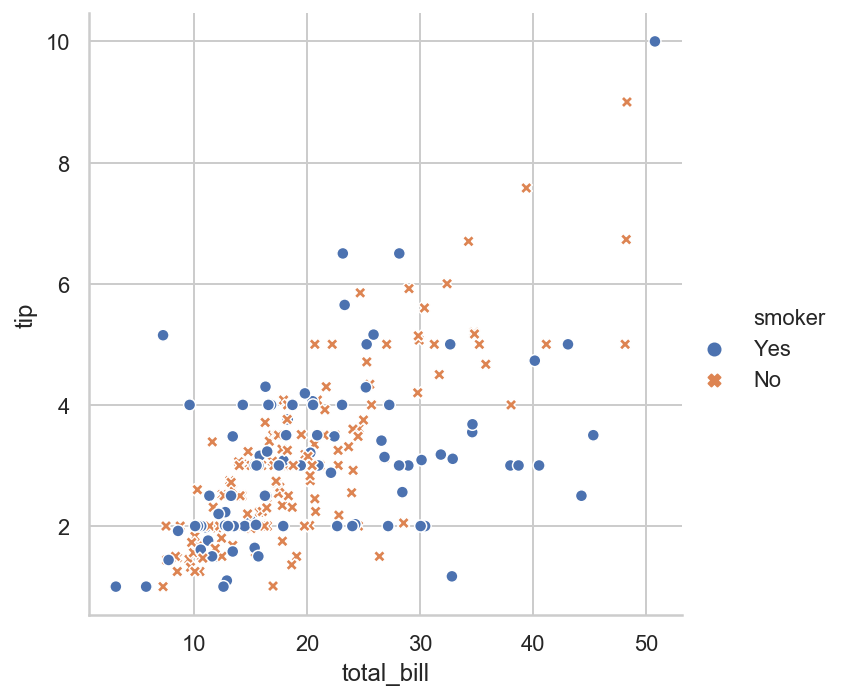

In [14]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips)

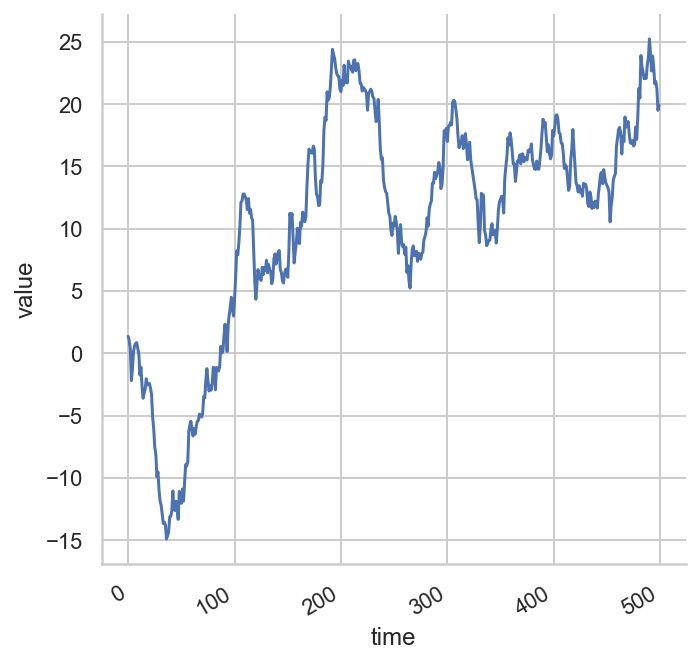

In [15]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

#### **catplot**

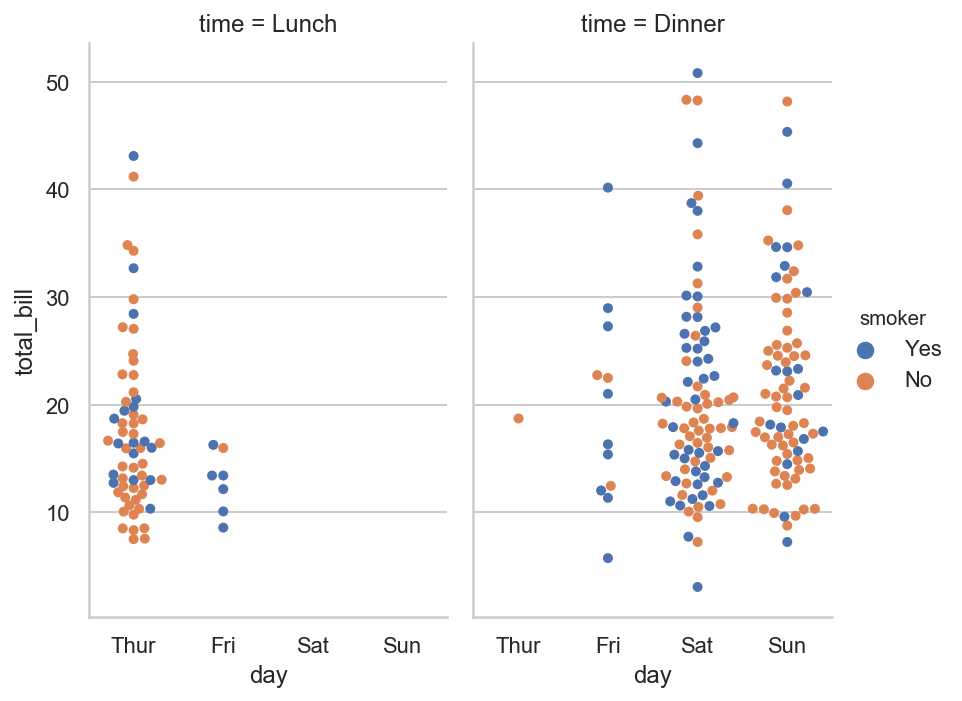

In [16]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips)

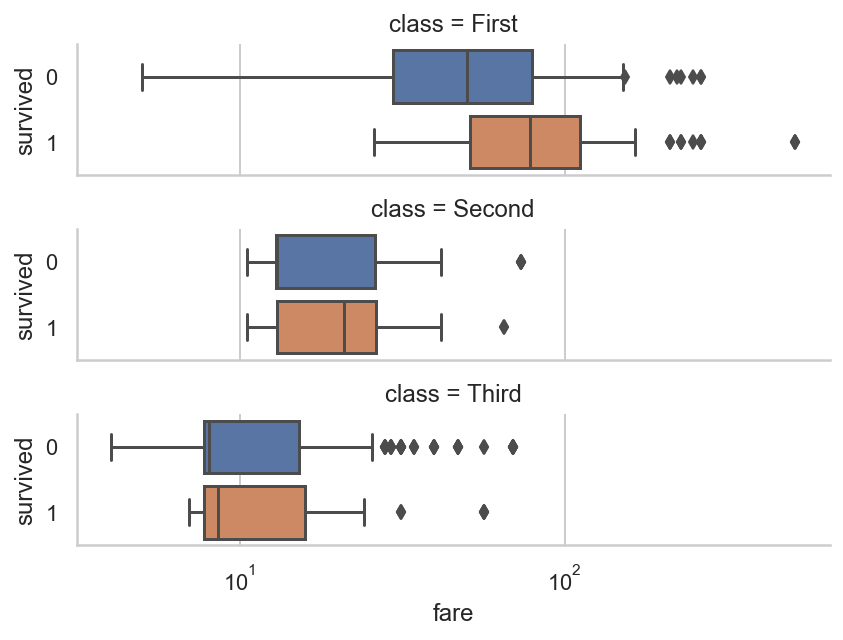

In [17]:
titanic = sns.load_dataset("titanic")
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");

#### **Pairplot**

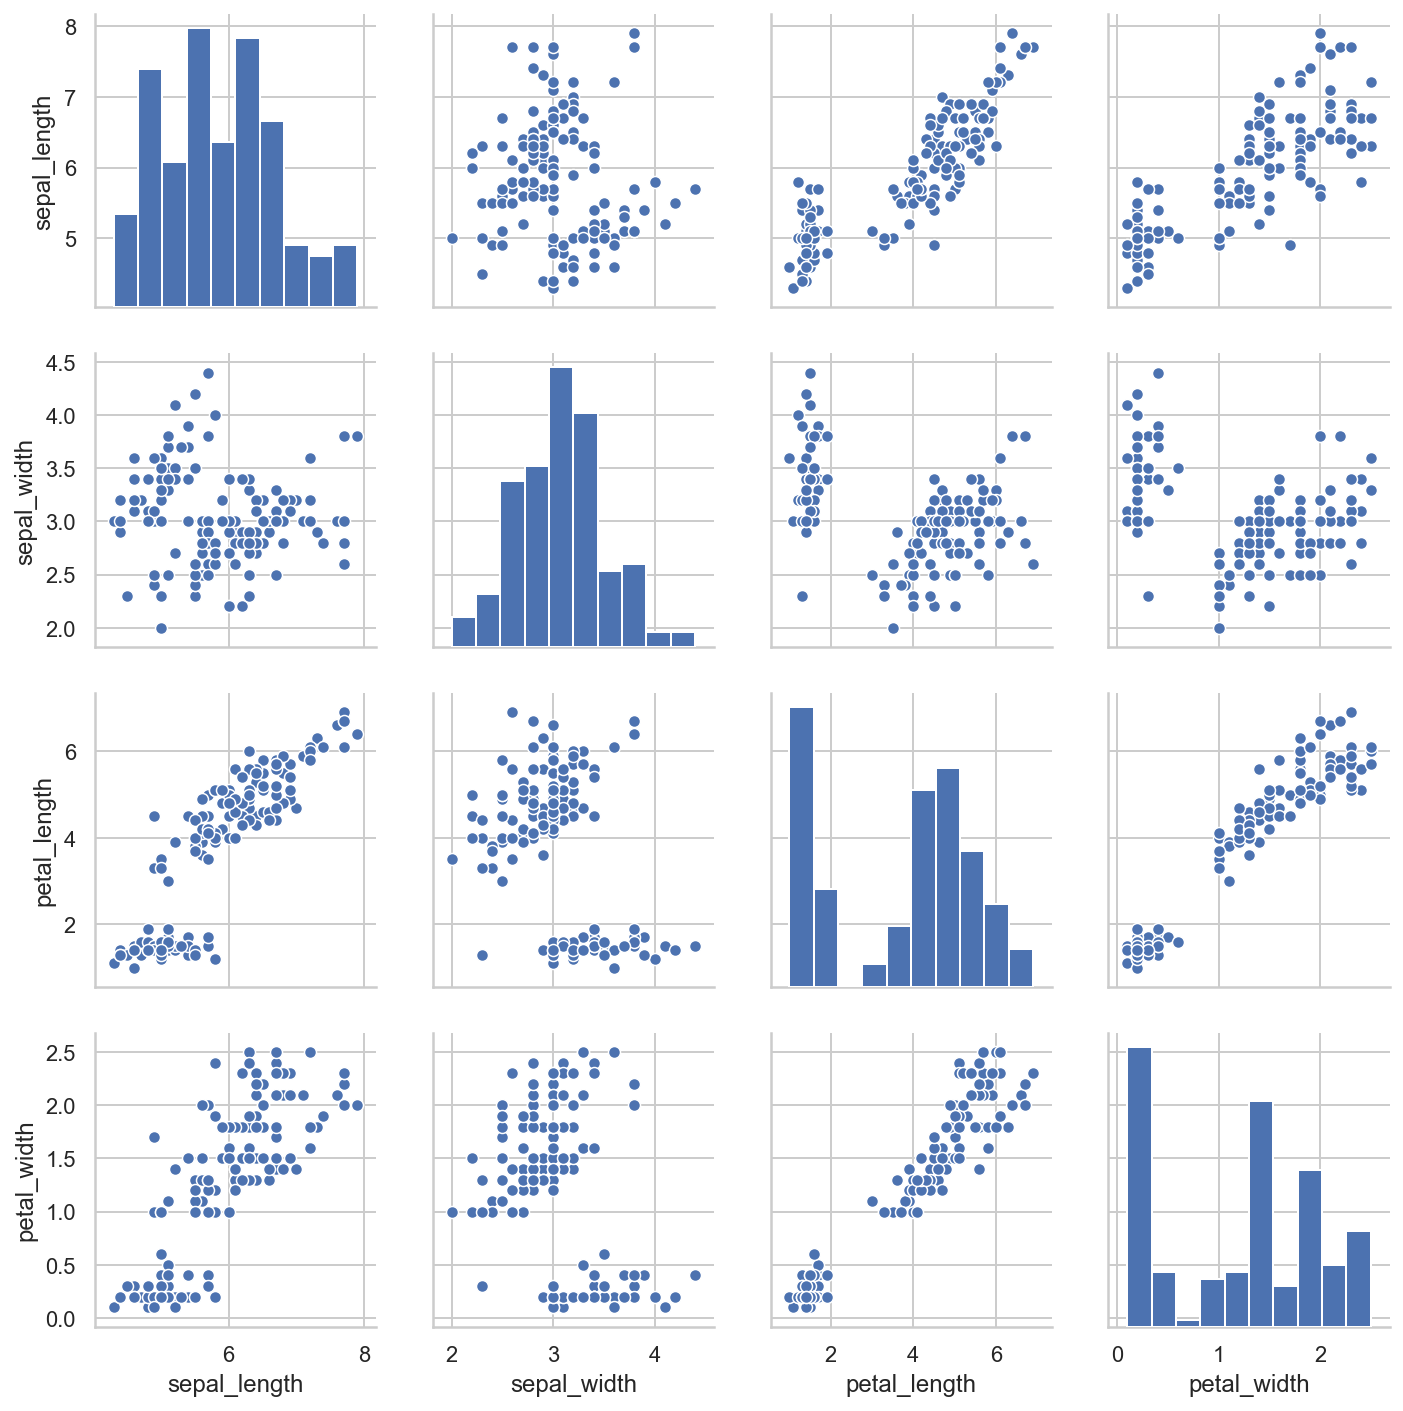

In [18]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

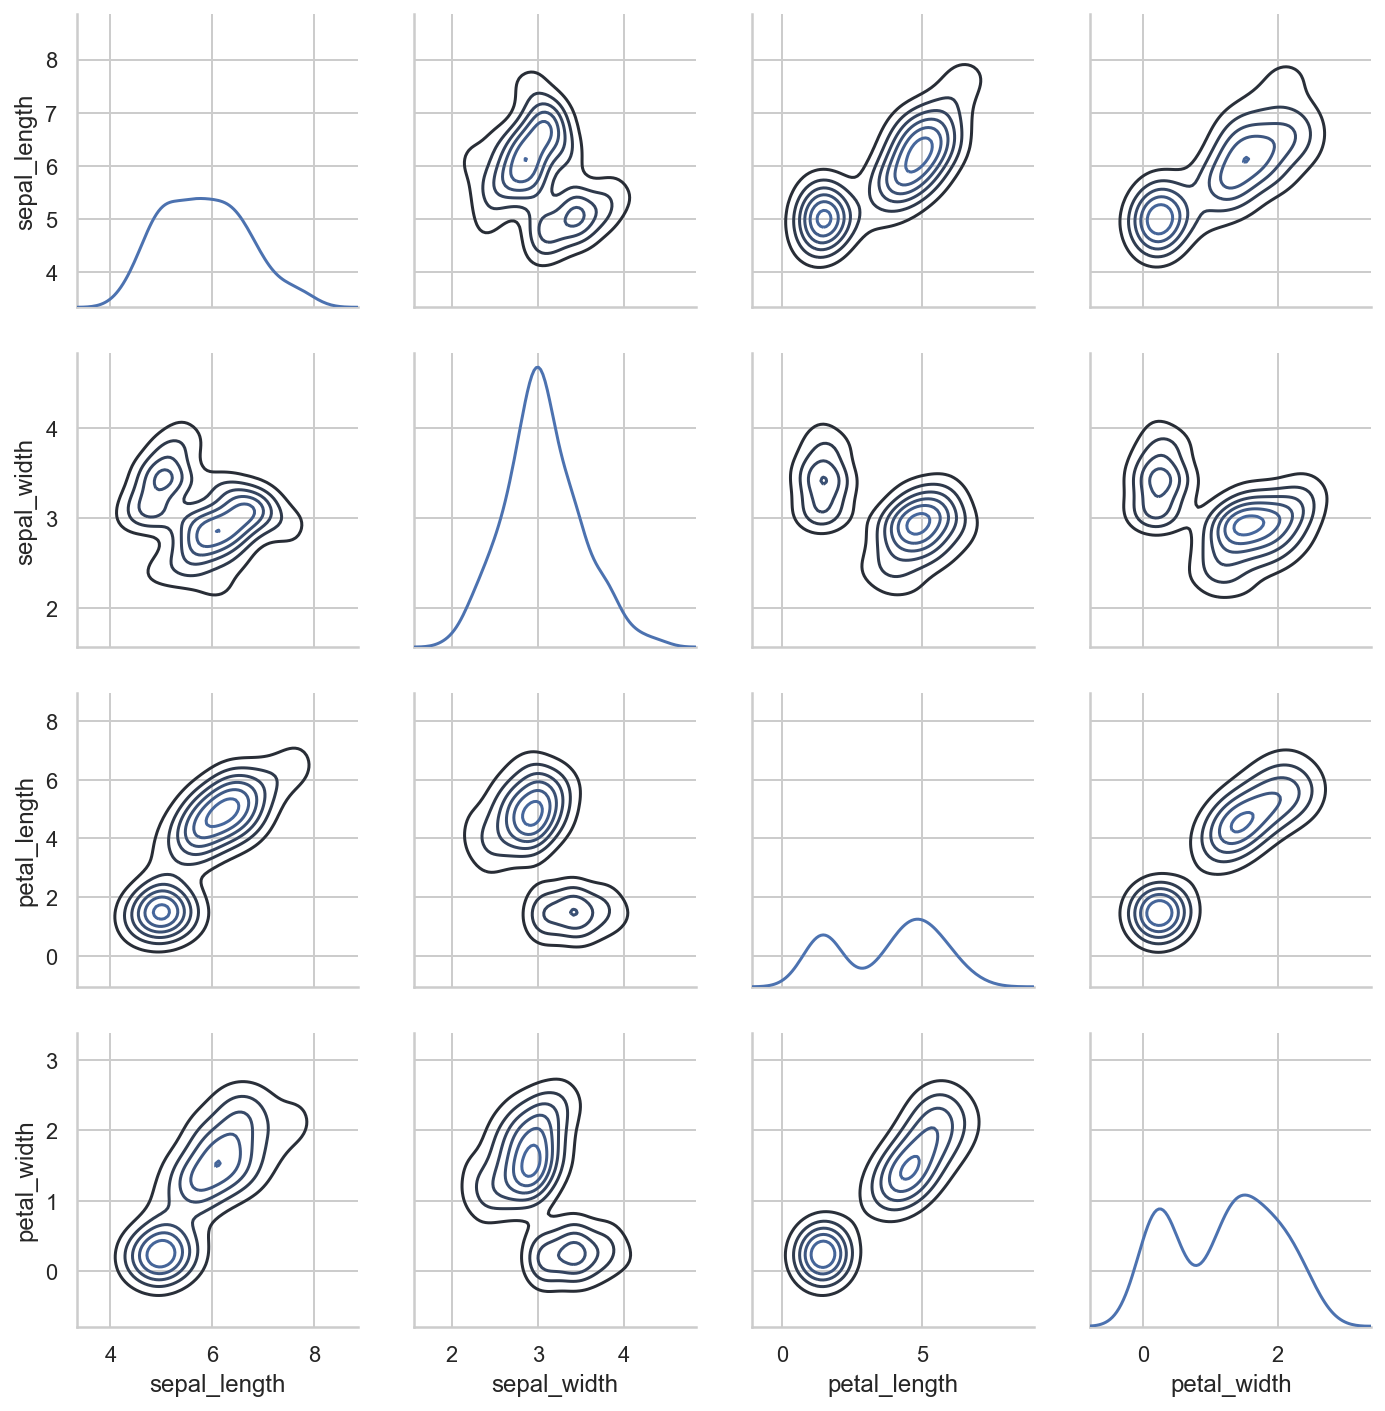

In [19]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

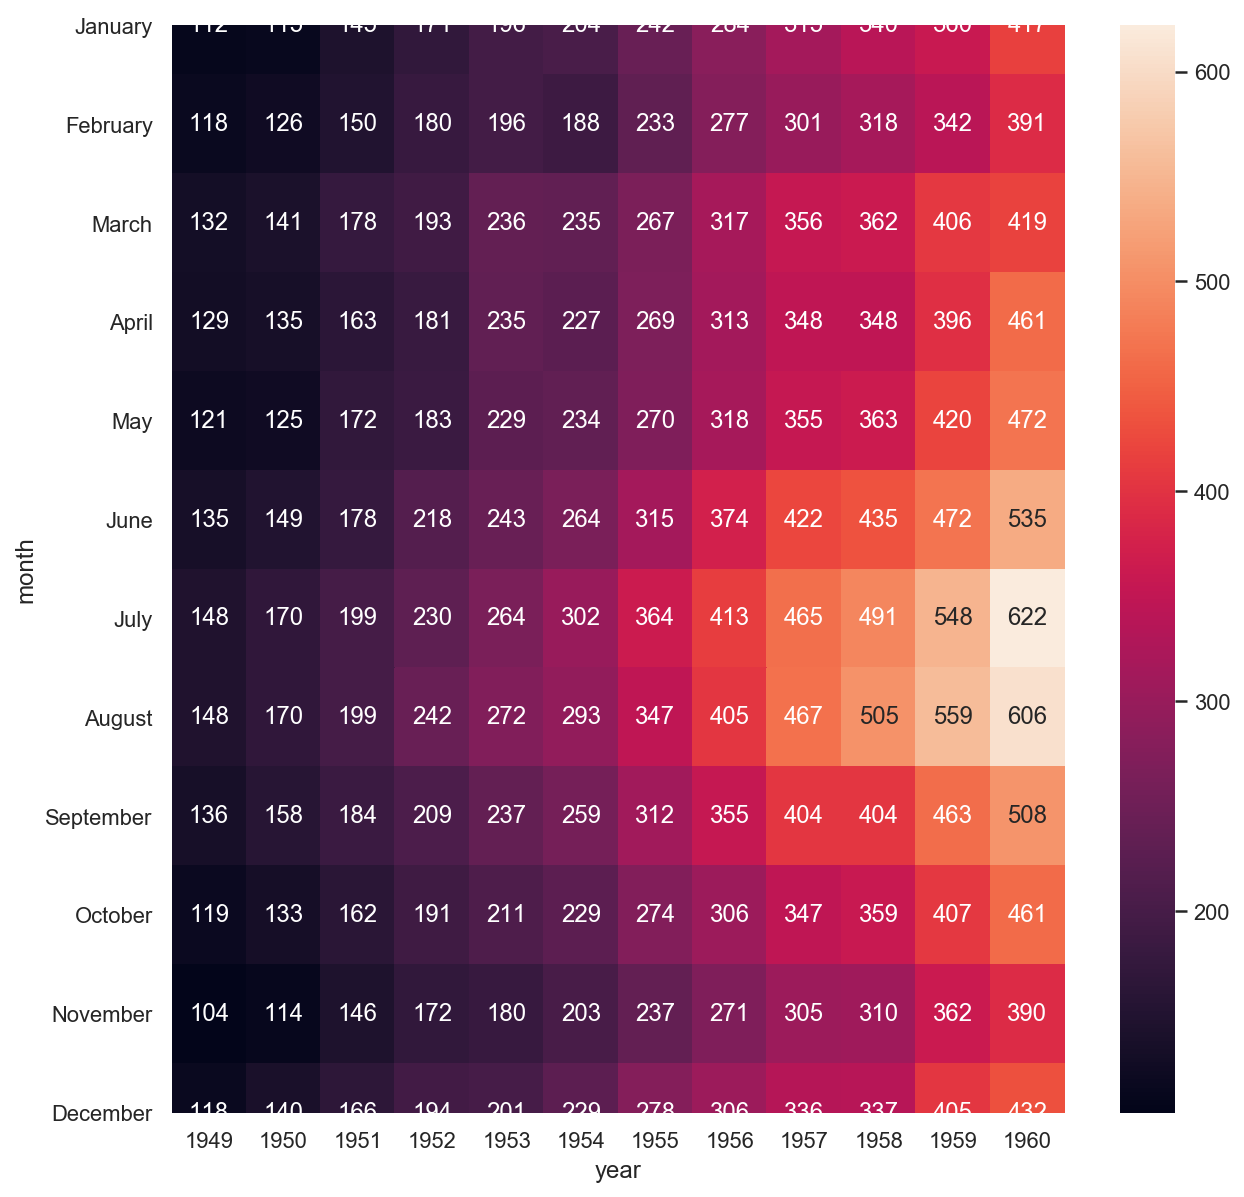

In [20]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
plt.figure(figsize=(10, 10))
ax = sns.heatmap(flights, annot=True, fmt="d")